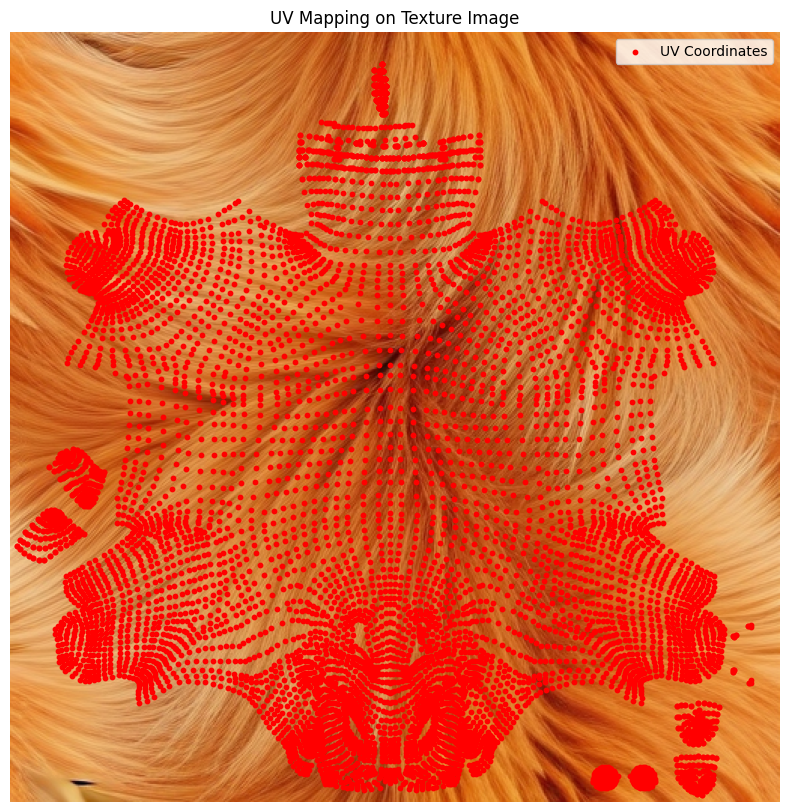

In [11]:
from app.utills.texture_utill import visualize_uv_on_texture,extract_mesh


glb_path = "./app/database/glb_files/3_munchkin_cat.glb"

mesh_data = extract_mesh(glb_path)

# 추출한 mesh_data에서 UV 좌표 (v_tex) 가져오기
uv_coords = mesh_data["v_tex"]

# 이미지 파일 경로와 함께 시각화 함수에 전달
image_path = './app/database/generation_img/Create_img_00098_.png'  # 원본 이미지 경로
visualize_uv_on_texture(image_path, uv_coords)

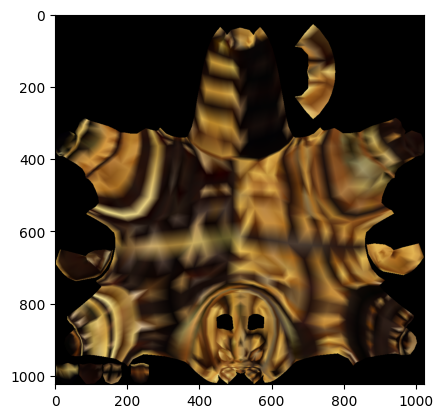

In [12]:
import matplotlib.pyplot as plt
from PIL import Image
texture_path = './app/database/output_textures/texure_1.png'
texture = Image.open(texture_path)
plt.imshow(texture)

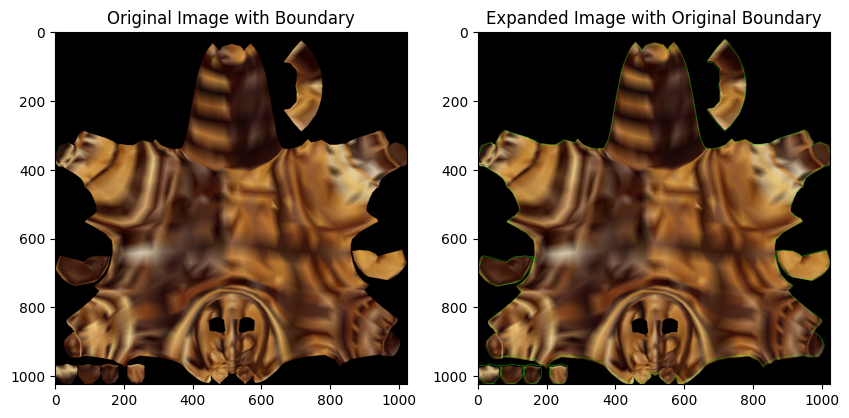

경계선 확대가 완료되었습니다. 결과 파일은 'expanded_texture.png'로 저장되었습니다.


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드
image_path = "./app/database/output_textures/texure_1.png"
image = cv2.imread(image_path)

# 이미지가 존재하는지 확인
if image is None:
    raise ValueError(f"Image not found at {image_path}")

# 이미지의 경계를 흑백으로 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 바이너리 이미지로 변환하여 경계선을 더 잘 검출할 수 있게 함
_, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# 경계선 검출
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 확장을 위한 비율 설정 (예: 5% 증가)
scale_factor = 1.01  # 5% 확대

# 이미지 크기 및 중앙 계산
h, w = image.shape[:2]
center = (w // 2, h // 2)

# 확대 행렬 생성
M = cv2.getRotationMatrix2D(center, 0, scale_factor)

# 이미지 확대
expanded_image = cv2.warpAffine(image, M, (w, h))

# 결과 저장
cv2.imwrite("expanded_texture.png", expanded_image)

# 경계선을 따라 그리기
cv2.drawContours(expanded_image, contours, -1, (0, 255, 0), 1)

# 결과 이미지와 원래 경계선 표시된 이미지를 출력
plt.figure(figsize=(10, 10))

# 원래 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image with Boundary")

# 경계선이 그려진 확대된 이미지 출력
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(expanded_image, cv2.COLOR_BGR2RGB))
plt.title("Expanded Image with Original Boundary")


plt.show()

print("경계선 확대가 완료되었습니다. 결과 파일은 'expanded_texture.png'로 저장되었습니다.")


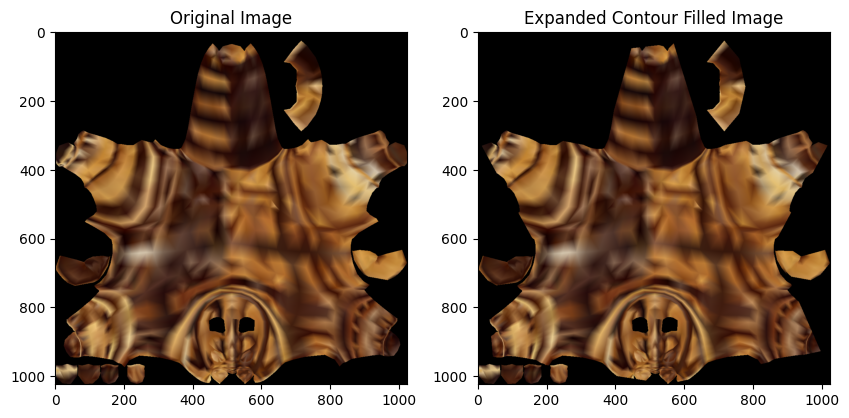

확장된 경계선 내부를 원본 이미지 색상으로 채운 결과가 저장되었습니다.


True

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드
image_path = "./app/database/output_textures/texure_1.png"
image = cv2.imread(image_path)

# 이미지가 존재하는지 확인
if image is None:
    raise ValueError(f"Image not found at {image_path}")

# 이미지의 경계를 흑백으로 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 바이너리 이미지로 변환하여 경계선을 더 잘 검출할 수 있게 함
_, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# 경계선 검출
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 빈 마스크 생성 (확장된 경계선을 채우기 위한 이미지와 동일한 크기)
mask = np.zeros_like(image)

# 각 경계선을 확장하고, 그 영역을 원래 이미지의 색으로 채움
for contour in contours:
    # 경계선 확장 (convexHull로 확장하는 대신 아래 코드를 사용해 경계선의 크기를 변경 가능)
    expanded_contour = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)  # 경계선을 조금 확장
    
    # 마스크에 확장된 경계선 그리기 (마스크의 해당 영역을 255로 설정)
    cv2.drawContours(mask, [expanded_contour], -1, (255, 255, 255), -1)

# 마스크 내부의 영역을 원본 이미지의 색상으로 채우기
expanded_image = np.where(mask == 255, image, 0)

# 결과 이미지 저장
cv2.imwrite("expanded_contour_filled_image.png", expanded_image)

# 결과 이미지 출력
plt.figure(figsize=(10, 10))

# 원래 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

# 확장된 경계선 내부를 채운 결과 이미지 출력
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(expanded_image, cv2.COLOR_BGR2RGB))
plt.title("Expanded Contour Filled Image")

plt.show()

print("확장된 경계선 내부를 원본 이미지 색상으로 채운 결과가 저장되었습니다.")
# 결과 이미지 저장
cv2.imwrite("result_with_expanded_contour.png", result)


In [30]:
import cv2
import numpy as np

# 이미지 로드
image = cv2.imread('./app/database/output_textures/texure_1.png')

# 1. Canny Edge Detection으로 경계선 추출
edges = cv2.Canny(image, 100, 200)

# 경계선 이미지 확장(채울 1% 범위를 계산하기 위해 사용)
h, w = image.shape[:2]
border_size = int(0.01 * min(h, w))  # 이미지 크기의 1%에 해당하는 값
expanded_edges = cv2.dilate(edges, np.ones((border_size, border_size), np.uint8))

# 2. 경계선 안쪽 마스크 생성
mask_inside = cv2.bitwise_not(expanded_edges)

# 3. 경계선 안쪽의 색상 채우기
result = np.copy(image)
for y in range(h):
    for x in range(w):
        if expanded_edges[y, x] != 0:  # 경계선 바깥쪽 영역에 해당하는 부분
            # 경계선 안쪽의 색상을 찾기 위한 이웃 픽셀의 색상 사용
            nearest_inside_pixel = cv2.findNonZero(mask_inside[max(0, y-border_size):min(h, y+border_size), 
                                                               max(0, x-border_size):min(w, x+border_size)])
            if nearest_inside_pixel is not None:
                nearest_y, nearest_x = nearest_inside_pixel[0][0]
                result[y, x] = image[nearest_y, nearest_x]

# 4. 결과 이미지 저장
cv2.imwrite('output_image.png', result)


True

In [6]:
from PIL import Image, ImageOps
import numpy as np
import cv2

# 이미지 불러오기
image_path = "./app/database/output_textures/cat_texture2.png"
img = Image.open(image_path)

# 이미지를 numpy 배열로 변환
img_np = np.array(img)


# 빨간색 영역을 감지 (빨간색: RGB 값 (255, 0, 0))
red_mask = (img_np[:, :, 0] == 255) & (img_np[:, :, 1] == 0) & (img_np[:, :, 2] == 0)

# 빨간 영역을 둘러싼 경계를 찾기
red_coords = np.column_stack(np.where(red_mask))
top_left = red_coords.min(axis=0)
bottom_right = red_coords.max(axis=0)

# 빨간 영역을 기준으로 이미지를 잘라내기
cropped_img = img_np[top_left[0]:bottom_right[0], top_left[1]:bottom_right[1]]

# 이미지를 확대 (OpenCV 사용)
scale_factor = 1.01  # 20%만큼 확장 예시
height, width = cropped_img.shape[:2]
new_size = (int(width * scale_factor), int(height * scale_factor))

# 이미지 확장
resized_img = cv2.resize(cropped_img, new_size, interpolation=cv2.INTER_LINEAR)

# 확장된 이미지 크기가 원본 이미지 영역에 맞도록 크기를 조정
target_height = min(new_size[1], img_np.shape[0] - top_left[0])
target_width = min(new_size[0], img_np.shape[1] - top_left[1])

# 덮어씌울 부분을 자르기
resized_img = resized_img[:target_height, :target_width]

# 원본 이미지 위에 확장된 이미지를 덮어씌우기
img_np[top_left[0]:top_left[0] + target_height, top_left[1]:top_left[1] + target_width] = resized_img

# 결과 저장 및 보여주기
final_img = Image.fromarray(img_np)
final_img.save("expanded_red_area_image.png")
final_img.show()

In [2]:
### 최종 성공 코드임 이거 가져가셈

import cv2
import numpy as np

# 이미지 불러오기
image = cv2.imread('app/database/mask/no_ear_cat_mask.png')

# 그레이스케일로 변환
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 이진화(Thresholding)를 사용하여 객체를 분리하기 위한 마스크 생성
_, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# 경계(컨투어) 추출
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 마스크 생성 (객체 영역만 채우기)
mask = np.zeros_like(image)
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# 팽창 연산을 객체 영역에만 적용
dilate_size = int(0.008 * min(image.shape[0], image.shape[1]))
kernel = np.ones((dilate_size, dilate_size), np.uint8)
dilated_image = cv2.dilate(image, kernel, iterations=1, borderType=cv2.BORDER_REPLICATE)

# 결과 저장
cv2.imwrite('dilated_image.png', dilated_image)


True

In [1]:
import json

with open("app/database/workflows/줄무늬고양이개선판.json", "r") as f:
    workflow_data = json.load(f)
    print(json.dumps(workflow_data, indent=4)) 

FileNotFoundError: [Errno 2] No such file or directory: 'app/database/workflows/줄무늬고양이개선판.json'

In [1]:
from app.utills.imggen_utill import teddy_cat
main = "An immersive close-up view entirely filled with the soft, dense, and fluffy texture of warm brown fur, showcasing an intricate pattern of fine strands. The scene displays a natural tabby-like design with alternating light and dark brown stripes blending smoothly across the frame, capturing each strand's texture with vivid detail. Delicate highlights and subtle shadows create a realistic, tactile shine that enhances the softness and depth. The overall appearance is seamless and continuous, with the frame fully enveloped in the inviting, layered richness of fur."
stripe = "A solid black background, completely dark and featureless. No textures, patterns, or lighting effects; the background should be uniformly black with a smooth, matte finish, creating a simple and unobtrusive setting."
leg = ""
ear = ""
teddy_cat(main,stripe,leg,ear)

이미지 생성 요청이 전송되었습니다.
이미지 생성 중... 다시 확인합니다.


2024-11-07 10:38:57,706 - INFO - 이미지 다운로드 완료: teddy_cat_00006_.png


이미지 생성 완료


In [23]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from pydantic import BaseModel,Field
from langchain_core.output_parsers import PydanticOutputParser

class FurFeatures(BaseModel):
    main:str = Field(description="전체적인 털 색상을 한 색상 혹은 자연스러운 색상조합으로 설명하시오")
    stripe:str = Field(description="줄무늬의 색상을 한 색상으로만 설명하시오.")
    feature:str = Field(description="털의 질감,길이등 털의 특징을 설명하시오.")
    leg:str = Field(description="다리의 색상을 한가지 색상으로 설명하시오.")
    chest:str = Field(description="가슴에 색상을 한가지 색상으로 설명하시오")
    tail:str = Field(description="꼬리에 색상을 한가지 색상으로 설명하시오")
    stripe_type:str = Field(description="줄무늬의 종류를 [없음/줄무늬/점박이] 3가지 중 하나로 표기하시오.")
    animal_type:str = Field(description="동물의 종류를 한 단어로 작성하시오.")

class GenerationPrompt(BaseModel):
    main:str = Field(description="전체적인 털 색상을 한 색상 혹은 자연스러운 색상조합에 털 이미지를 생성하는 프롬프트를 작성하세요")
    stripe:str = Field(description="줄무늬의 색상을 한 색상으로 털의 질감 없이 이미지를 생성하는 프롬프트를 작성하세요.")
    leg:str = Field(description="다리의 색상을 한 색상에 털 이미지를 털 이미지를 생성하는 프롬프트를 작성하세요")
    tail:str = Field(description="꼬리의 색상을 한 색상에 털 이미지를 생성하는 프롬프트를 작성하세요")


model = ChatOpenAI(model_name = 'gpt-4o-mini')

output_parser = PydanticOutputParser(pydantic_object=FurFeatures)
format_instructions = output_parser.get_format_instructions()

generation_output_parser = PydanticOutputParser(pydantic_object=GenerationPrompt)
generation_format_instruction =generation_output_parser.get_format_instructions()


In [17]:
prompt = PromptTemplate.from_template(
    """
당신은 DESCIPTION에 설명된 특징을 FORMAT에 맞게 나누어서 설명하는 어시스턴트입니다.

만약 색상이 주황색 혹은 오렌지 색이면 밝은 황갈색으로 변겨해서 작성하시오.

QUESTION:
{question}

DESCRIPTION:
{description}

FORMAT:
{format}

"""
)

prompt = prompt.partial(format=format_instructions)

In [18]:
description = """
1. The overall color of the animal's fur is orange.

2. The texture and length of the animal's fur appear to be short and smooth. The cat's coat looks sleek and well-groomed, without any long or shaggy areas visible.

3. Yes, the animal has a visible stripe or pattern on its fur. The pattern consists of orange and white stripes running down the cat's body.

4. The stripe pattern is not a tiger stripe pattern. It's more of a tabby or domestic short-haired cat pattern, with alternating orange and white stripes covering the cat's body.

5. Fur color for specific body parts:
   - Legs: Orange with white stripes
   - Belly: Orange with white stripes
   - Chest: White
   - Back: Orange with white stripes
   - Face: Orange with white stripes

The cat's face is predominantly orange, but it has white areas around the mouth and nose, creating a contrast with the orange fur.
"""

In [20]:
chain = prompt|model|output_parser

response = chain.invoke(
    {
        "question":"아래 내용을 분류해주세요",
        "description":description
    }
)

print(response)

main='밝은 황갈색' stripe='흰색' feature='짧고 부드러운 털, 매끄럽고 잘 다듬어진 외모' leg='밝은 황갈색' chest='흰색' tail='밝은 황갈색' stripe_type='줄무늬' animal_type='고양이'


In [30]:
response.stripe_type

'줄무늬'

In [24]:
gen_prompt = PromptTemplate.from_template(
    """
당신은 이미지 프롬프트를 작성하는 어시스턴트입니다.
아래 주의사항을 참고하여 DESCIPTION에 설명된 동물의 부위별 털 특징을 이용하여 부위별로 프롬프트를 FORMAT에 맞게 작성하시오.

1. 이미지를 생성할 때 털의 질감이 뚜렷하게 나오게 작성하시오.
2. 모든 이미지 생성문구에는 Symmetrical composition, perfectly symmetrical, Evenly mirrored, balanced symmetry 와 같은 좌우가 대칭되게 생성하는 문구를 하나는 반드시 포함하시오.
3. 이미지는 동물의 털을 생성한다고 명시하고 동물의 형상이 나오지 않게 프롬프트를 작성하시오.
4. 프롬프트에는 부위(belly, paws, and face areas)가 명시적으로 언급되어서는 안됩니다.

QUESTION:
{question}

DESCRIPTION:
{description}

FORMAT:
{format}

"""
)

gen_prompt = gen_prompt.partial(format=generation_format_instruction)

In [25]:
gen_chain = gen_prompt|model|generation_output_parser

gen_response = gen_chain.invoke(
    {
        "question":"해당 내용으로 프롬프트를 작성해주세요.",
        "description":response
    }
)

In [26]:
gen_response

GenerationPrompt(main='Generate a texture-rich image of fur in a bright tawny color, showcasing a smooth and well-groomed appearance, with balanced symmetry.', stripe='Create an image of fur with a white stripe, emphasizing the texture distinctly, ensuring perfectly symmetrical composition.', leg='Produce an image of fur in a bright tawny color, highlighting the soft and short fur texture, with evenly mirrored design.', tail='Illustrate a texture-filled fur image in bright tawny color, maintaining balanced symmetry in the presentation.')

In [34]:
gen_response.main

'Generate a texture-rich image of fur in a bright tawny color, showcasing a smooth and well-groomed appearance, with balanced symmetry.'

In [35]:
gen_response.tail

'Illustrate a texture-filled fur image in bright tawny color, maintaining balanced symmetry in the presentation.'

In [36]:
gen_response.stripe

'Create an image of fur with a white stripe, emphasizing the texture distinctly, ensuring perfectly symmetrical composition.'

In [37]:
gen_response.leg

'Produce an image of fur in a bright tawny color, highlighting the soft and short fur texture, with evenly mirrored design.'